In [1]:
train = pd.read_csv("data/0409_train.csv").set_index('VisitNumber')
test = pd.read_csv("data/0409_test.csv").set_index('VisitNumber')

In [2]:
train.head()

,TripType,Weekday,Purchases,Returns,accessaries,accessories,auto,baby,deco,electronics,...,kitchen,men,office,others,pets,pharmacy,service,sport_outdoor,tmp,women
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,22,5,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,18,5,30,2,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
9,5,5,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,5,5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,Weekday,Purchases,Returns,accessaries,accessories,auto,baby,deco,electronics,entertainment,...,kitchen,men,office,others,pets,pharmacy,service,sport_outdoor,tmp,women
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,5,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,4,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_VN = test.reset_index()
test_VN.head()

,VisitNumber,Weekday,Purchases,Returns,accessaries,accessories,auto,baby,deco,electronics,...,kitchen,men,office,others,pets,pharmacy,service,sport_outdoor,tmp,women
0,1,5,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2,3,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,5,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

In [7]:
mytrain, mytest = train_test_split(train, test_size = .4)

In [8]:
mytrain_ = mytrain.drop(['TripType'], axis=1)

In [9]:
mytest_ = mytest.drop(['TripType'], axis=1)

In [10]:
dtrain = xgb.DMatrix(np.asarray(mytrain_), label = np.asarray(mytrain.TripType))
dtest = xgb.DMatrix(np.asarray(mytest_), label = np.asarray(mytest.TripType))

In [11]:
num_round = 300
param1 = {'objective': 'multi:softprob', 'num_class':38, "max_delta_step": 5}
watchlist1 = [(dtrain,'train'), (dtest, 'eval')]

bst = xgb.train(param1, dtrain, num_round, watchlist1, early_stopping_rounds=10)

[0]	train-merror:0.430458	eval-merror:0.441678
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 10 rounds.
[1]	train-merror:0.390931	eval-merror:0.401333
[2]	train-merror:0.37203	eval-merror:0.387797
[3]	train-merror:0.368877	eval-merror:0.386229
[4]	train-merror:0.363111	eval-merror:0.382937
[5]	train-merror:0.360707	eval-merror:0.381918
[6]	train-merror:0.357884	eval-merror:0.380298
[7]	train-merror:0.355167	eval-merror:0.37839
[8]	train-merror:0.353599	eval-merror:0.378181
[9]	train-merror:0.351038	eval-merror:0.37711
[10]	train-merror:0.348808	eval-merror:0.376483
[11]	train-merror:0.347136	eval-merror:0.37664
[12]	train-merror:0.346265	eval-merror:0.375986
[13]	train-merror:0.344418	eval-merror:0.375516
[14]	train-merror:0.34306	eval-merror:0.37549
[15]	train-merror:0.341265	eval-merror:0.374706
[16]	train-merror:0.339401	eval-merror:0.374027
[17]	train-merror:0.338182	eval-merror:0.37353
[18]	t

In [12]:
dmtest = xgb.DMatrix(np.asarray(test)) 
pred_prob2 = bst.predict(dmtest)

In [13]:
col_array = np.asarray([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [14]:
columns = {0:"TripType_3", 1: "TripType_4", 2: "TripType_5", 3: "TripType_6", 
                4: "TripType_7", 5: "TripType_8", 6: "TripType_9", 7: "TripType_12", 8: "TripType_14", 
                9: "TripType_15", 10: "TripType_18", 11: "TripType_19", 12: "TripType_20", 13: "TripType_21",
                14: "TripType_22", 15: "TripType_23", 16: "TripType_24", 17: "TripType_25", 18: "TripType_26", 
                19: "TripType_27", 20: "TripType_28", 21: "TripType_29", 22: "TripType_30", 23: "TripType_31", 
                24: "TripType_32", 25: "TripType_33", 26: "TripType_34", 27: "TripType_35", 28: "TripType_36", 
                29: "TripType_37", 30: "TripType_38", 31: "TripType_39", 32: "TripType_40", 33: "TripType_41", 
                34: "TripType_42", 35: "TripType_43", 36: "TripType_44", 37: "TripType_999"}

In [15]:
def predic_proba_to_csv(pred_prob):
    proba_df = pd.DataFrame(pred_prob, columns=col_array)
    proba_df.columns = proba_df.columns.map(lambda x: columns[x])
    sub_df = pd.concat([test_VN[["VisitNumber"]], proba_df], axis=1)
    return sub_df.to_csv("data/trial_15.csv", index=False)

In [16]:
predic_proba_to_csv(pred_prob2)

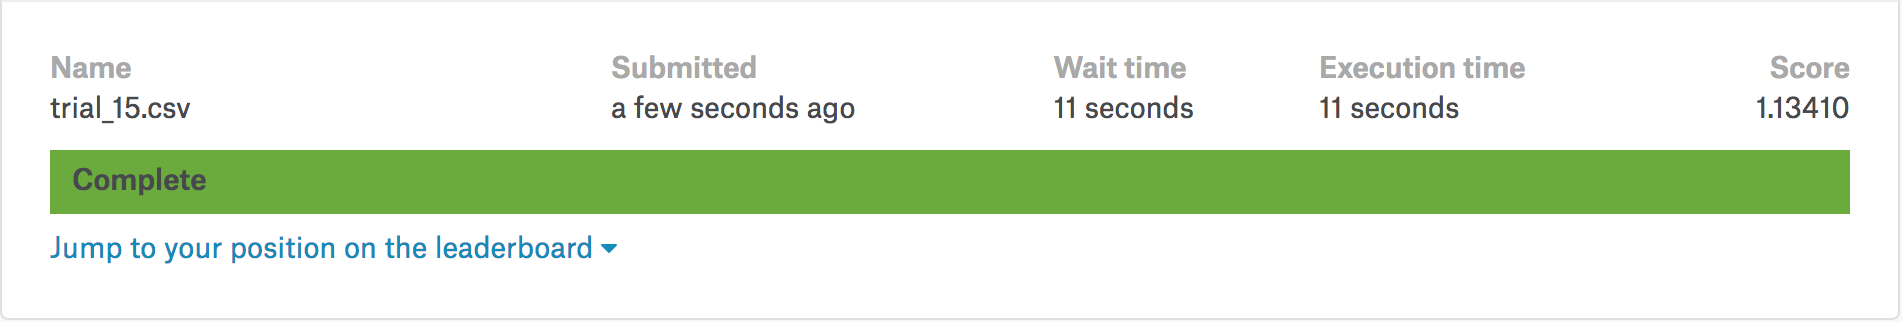